In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [3]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rc('legend',fontsize=15) # using a size in points
import pygtc


In [4]:
plabels = ["$M_{*}$", "$\\alpha$", "$\\sigma$"," $\\gamma$", "$\\beta$", "$\\tau$"]

priors = [[9.5,11.5], [-1,7], [0,5], [-2,2], [-3,2], [-2,2]]

fixed = [False, True, True, False, False, False]

### first the alpha permutations

In [5]:
sigma1 = jsm_mcmc.Chain("../../../data/Feature_Recovery/sigma_permutations/mock_1/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=15)

sigma2 = jsm_mcmc.Chain("../../../data/Feature_Recovery/sigma_permutations/mock_2/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=15)

sigma3 = jsm_mcmc.Chain("../../../data/Feature_Recovery/sigma_permutations/mock_3/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=15)

sigma4 = jsm_mcmc.Chain("../../../data/Feature_Recovery/sigma_permutations/mock_4/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=15)

In [6]:
colors = ['orange', 'green', 'cornflowerblue', 'mediumpurple']

In [7]:

chain_labels = ["$\\alpha = $" + sigma1.constraints[0] + "\n $\\sigma = $" + sigma1.constraints[1],
                "$\\alpha = $" + sigma2.constraints[0] + "\n $\\sigma = $" + sigma2.constraints[1],
                "$\\alpha = $" + sigma3.constraints[0] + "\n $\\sigma = $" + sigma3.constraints[1],
                "$\\alpha = $" + sigma4.constraints[0] + "\n $\\sigma = $" + sigma4.constraints[1]]

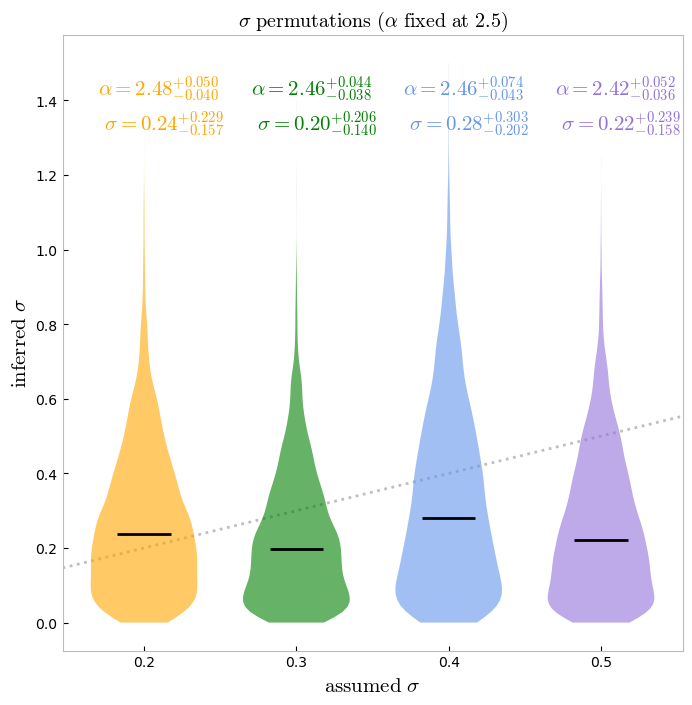

In [8]:
sigma_permuattions = [0.2, 0.3, 0.4, 0.5]

data = [sigma1.clean[:,1], sigma2.clean[:,1],  sigma3.clean[:,1], sigma4.clean[:,1]]

# Create a violin plot
plt.figure(figsize=(8, 8))
plt.title("$\\sigma\ \mathrm{permutations}\ (\\alpha\ \mathrm{fixed\ at}\ 2.5)$", color="black")
violins = plt.violinplot(data, showmeans=False, showmedians=True, positions=sigma_permuattions, widths=0.07, showextrema=False)

for i, violin in enumerate(violins['bodies']):
        violin.set_facecolor(colors[i])
        #violin.set_edgecolor(colors[i])
        violin.set_alpha(0.6)

violins['cmedians'].set_color("black")

plt.xticks(sigma_permuattions, ["0.2", "0.3", "0.4", "0.5"])
plt.ylabel('$\mathrm{inferred}\ \\sigma$', fontsize=15)
plt.xlabel("$\mathrm{assumed}\ \\sigma$", fontsize=15)

yloc = [2.4, 3.3, 4.2, 2.8]
xloc = [1.9, 2.35, 2.8, 3.32]
for i, label in enumerate(chain_labels):
        plt.text(sigma_permuattions[i]-0.03, 1.32, label, color=colors[i], fontsize=15)


xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle=':', color='grey', scalex=False, scaley=False, zorder=0, alpha=0.5)

#plt.grid()
plt.savefig("../../../paper_1/figures/feature_recovery/sigma_violin.pdf", bbox_inches='tight')

plt.show()


In [9]:
hmm = np.array([[2.5, 0.2], [2.5, 0.3], [2.5, 0.4], [2.5, 0.5]])

data = [sigma1.clean, sigma2.clean, sigma3.clean, sigma4.clean]

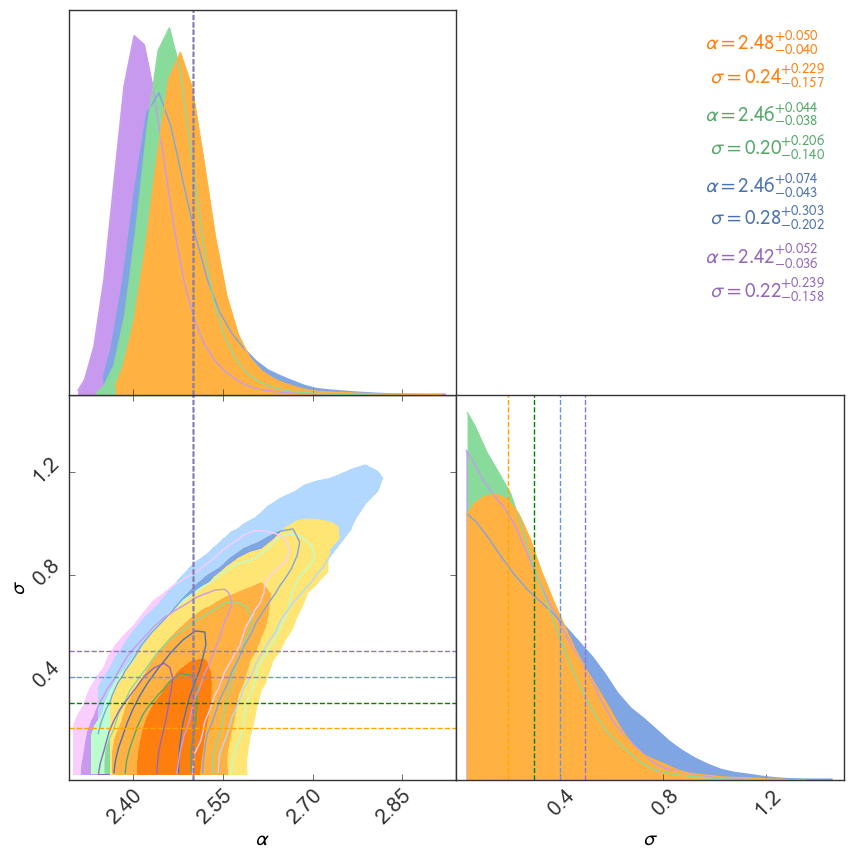

In [10]:
test = jsm_mcmc.MulitChain(data, chain_labels, hmm, fixed)
test.plot_posteriors(truths=hmm, truthColors=colors, truthLineStyles=["--"]*6, filledPlots=True, nContourLevels=3, plotName="../../../paper_1/figures/appendix/sigma_corner.pdf")